In [73]:
import pandas as pd


In [74]:
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')
df.head(2)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure


In [75]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Create new features that might be relevant for prediction

# Example: Difference between process and air temperature
df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Example: Interaction between rotational speed and torque
df['speed_torque_interaction'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

# Continue with any additional feature engineering you find relevant


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
X = df.drop(['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'], axis=1)  # Exclude non-feature columns
y = df['Target']  # Prediction target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9905


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load and prepare your data here
# data = pd.read_csv('/path/to/your/dataset.csv')

# Assuming 'data' is pre-processed and ready for model training
X = df.drop(['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'], axis=1)
y = df['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       0.96      0.72      0.82        61

    accuracy                           0.99      2000
   macro avg       0.97      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Feature engineering: Convert 'Type' from categorical to numerical
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Define features and target variable
X = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df['Target']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9873333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.90      0.67      0.77        93

    accuracy                           0.99      3000
   macro avg       0.94      0.83      0.88      3000
weighted avg       0.99      0.99      0.99      3000



In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'Target' is the column to predict.

# If 'Type' or 'Failure Type' are used as features, they need to be encoded.
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])

# Splitting the data into features and target
X = df.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
y = df['Target']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9905
Confusion Matrix:
 [[1937    2]
 [  17   44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       0.96      0.72      0.82        61

    accuracy                           0.99      2000
   macro avg       0.97      0.86      0.91      2000
weighted avg       0.99      0.99      0.99      2000



In [82]:
# Basic data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')
# Dropping 'UDI' as it's just an identifier
data = df.drop('UDI', axis=1)

# Splitting data into features and target
X = data.drop(['Target', 'Failure Type'], axis=1)
y = data['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining preprocessing for numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Applying preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


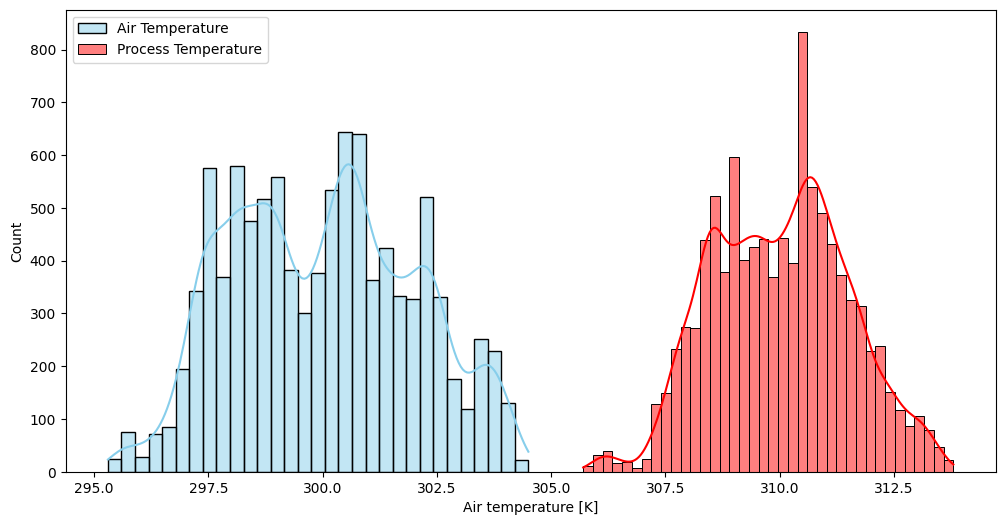

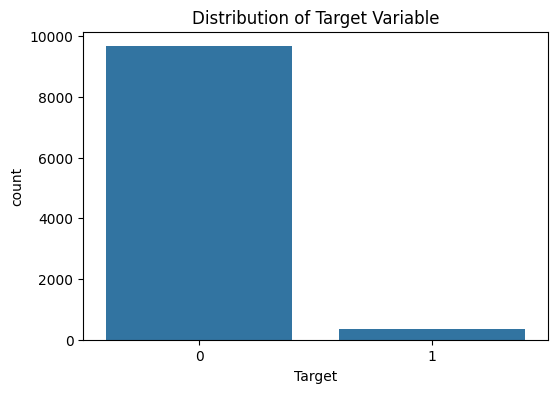

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of air and process temperatures
plt.figure(figsize=(12, 6))
sns.histplot(data['Air temperature [K]'], color='skyblue', label='Air Temperature', kde=True)
sns.histplot(data['Process temperature [K]'], color='red', label='Process Temperature', kde=True)
plt.legend()
plt.show()

# Checking the balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()
